In [39]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import nltk
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Text Preprocessing

In [4]:
df = pd.read_excel("/home/abdullah/Documents/Some Projects in Python/NLP First Project/wikipedia_data.xlsx")

In [5]:
df.head()

,Paragraphs
0,"Azerbaijan,[a] officially the Republic of Azer..."
1,The territory of what is now Azerbaijan was ru...
2,"By the late 19th century, an Azerbaijani natio..."
3,Azerbaijan is a unitary semi-presidential repu...
4,The vast majority of the country's population ...


In [6]:
df.columns = df.columns.str.lower()

In [7]:
df['paragraphs'] = df['paragraphs'].str.lower()

In [8]:
df['paragraphs'] = df['paragraphs'].str.replace('\d', "", regex = True)

In [9]:
df['paragraphs'] = df['paragraphs'].str.replace('[^\w\s]', "", regex = True)

In [10]:
sw = stopwords.words('english')

In [11]:
df['paragraphs'] = df['paragraphs'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [12]:
temp_df = pd.Series(" ".join(df['paragraphs']).split()).value_counts()

In [13]:
drops = temp_df[temp_df <= 1]

In [14]:
df['paragraphs'] = df['paragraphs'].apply(lambda x: " ".join(x for x in str(x).split() if x not in drops))

In [15]:
df['paragraphs'] = df['paragraphs'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))

In [16]:
df['paragraphs'] = df['paragraphs'].apply(lambda x: " ".join(x for x in str(x).split() if len(x) != 2))

# Text Visualization

In [17]:
tf = df['paragraphs'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

In [18]:
tf.columns = ["words", "tf"]

In [19]:
tf.sort_values("tf", ascending = False)

,words,tf
41,azerbaijan,202.00
50,azerbaijani,77.00
22,country,61.00
2,republic,37.00
80,national,33.00
...,...,...
490,subtropical,2.00
489,characterized,2.00
488,foothill,2.00
487,cold,2.00


### BAR PLOT

<Axes: xlabel='words'>

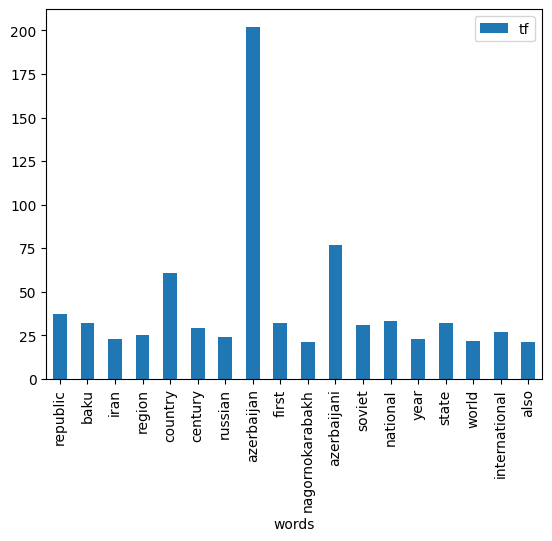

In [20]:
tf[tf['tf'] >= 20].plot.bar(x = 'words', y = 'tf')

### WordCloud

In [22]:
text = " ".join(x for x in df.paragraphs)

In [56]:
cmap = mcolors.ListedColormap(["blue", "red", "green"])

In [57]:
wc = WordCloud(background_color = "white", max_words = 100, max_font_size = 70, colormap=cmap).generate(text)

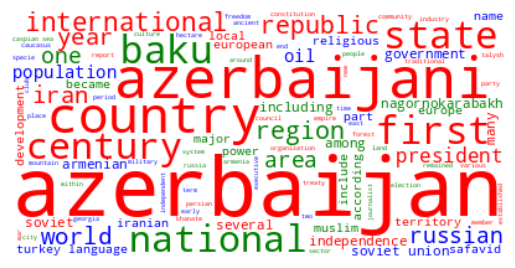

In [58]:
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()